<a href="https://colab.research.google.com/github/kengmingcheng/ML_Projects/blob/master/kaggle/house_prices/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from subprocess import check_output
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Upload files
from google.colab import files
!kaggle competitions download -c house-prices-advanced-regression-techniques

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test2 = pd.read_csv("test.csv")
all_data=pd.concat([train,test], sort=False)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
train_id = train['Id']
test_id = test['Id']
y_train = train['SalePrice']
tran_len = train.shape[0]

In [ ]:
# Drop id column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [ ]:
print("Training data size: {}".format(train.shape))
print("Testing data size: {}".format(test.shape))

Training data size: (1460, 80)
Testing data size: (1459, 79)


In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
print(len(train.select_dtypes(include=['object']).columns))

43


In [ ]:
train.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
print(len(train.select_dtypes(exclude=['object']).columns))

37


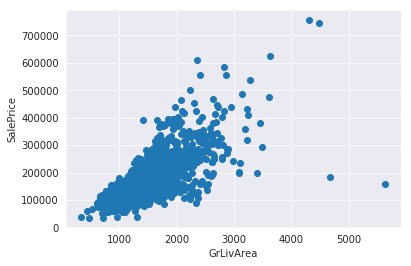

In [ ]:
# Outliers
sns.set_style('darkgrid')
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [ ]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index)

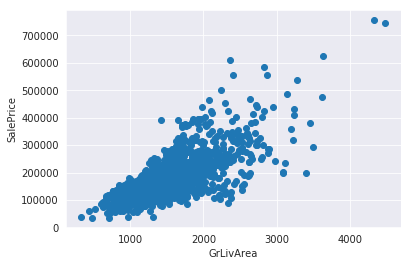

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()


mu = 180932.91906721535 and sigma = 79467.78892987774


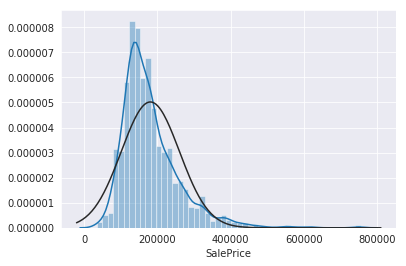

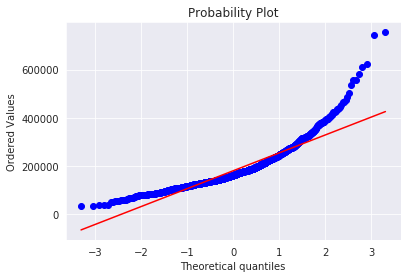

In [ ]:
sns.distplot(train['SalePrice'], fit = norm)

# Get the fitted parameters
mu, sigma = norm.fit(train['SalePrice'])
print('\nmu = {} and sigma = {}'.format(mu, sigma))

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
print('Skewness: %f' %train['SalePrice'].skew())
print('Kurtosis: %f' %train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


In [ ]:
#　Log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])


mu = 12.024015155682552 and sigma = 0.3995757283645756


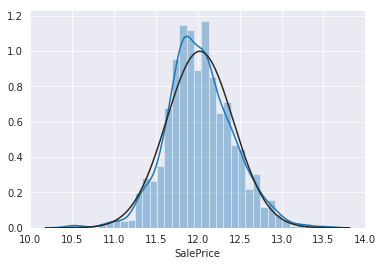

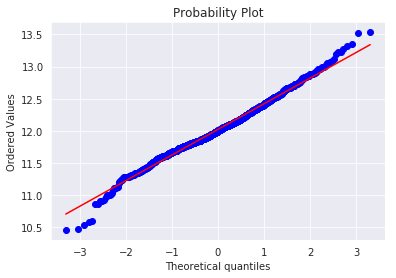

In [ ]:
sns.distplot(train['SalePrice'], fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
print('\nmu = {} and sigma = {}'.format(mu, sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
train_len = train.shape[0]
test_len = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test), sort = False).reset_index(drop=True)
all_data.drop(['SalePrice'],axis = 1, inplace=True)
print('all_data size: {}'.format(all_data.shape))

all_data size: (2917, 79)


In [ ]:
# Missing data in training set
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [ ]:
# Missing data in testing set
test_total = test.isnull().sum().sort_values(ascending = False)
test_percent = (test.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data = pd.concat([test_total,test_percent],axis=1,keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1456,0.998628
MiscFeature,1408,0.965706
Alley,1352,0.927298
Fence,1169,0.801783
FireplaceQu,730,0.500686
LotFrontage,227,0.155693
GarageCond,78,0.053498
GarageFinish,78,0.053498
GarageYrBlt,78,0.053498
GarageQual,78,0.053498


In [ ]:
all_data_na = all_data.isnull().sum().sort_values(ascending=False)
all_data_naper = (all_data.isnull().sum() / len(all_data)).sort_values(ascending=False)
missing_data = pd.DataFrame({'Total':all_data_na,'Ratio':all_data_naper})
missing_data[missing_data['Total']>0]

,Total,Ratio
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageCond,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508


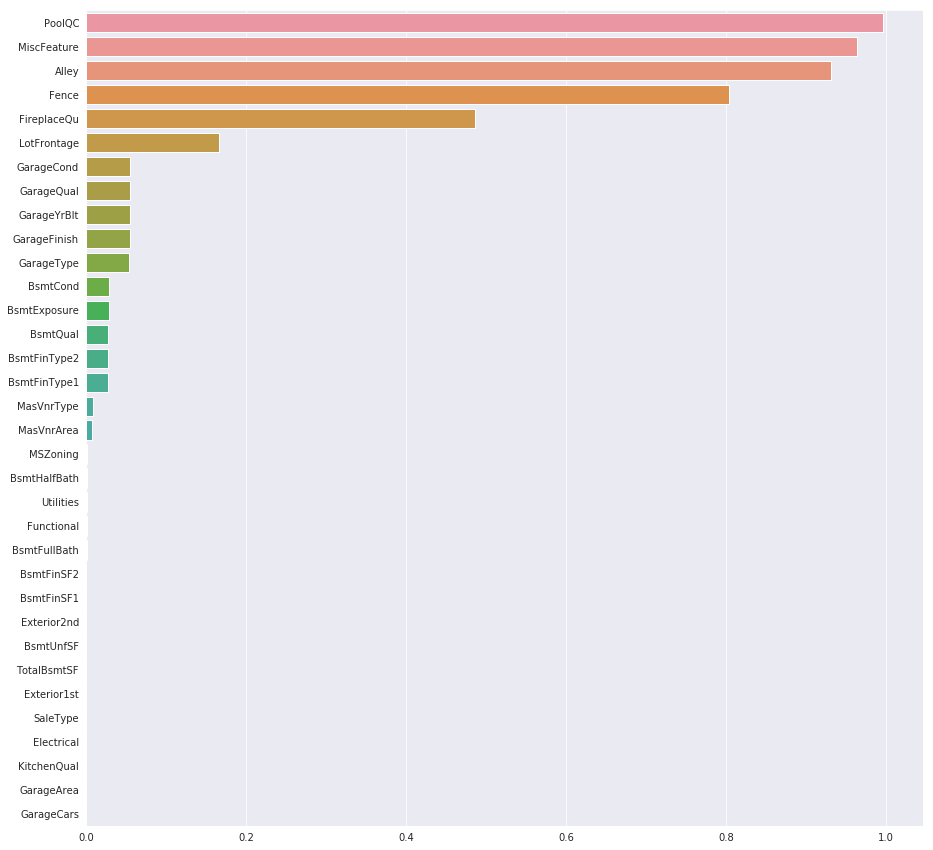

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(all_data_naper[all_data_naper >0], all_data_naper[all_data_naper >0].index)

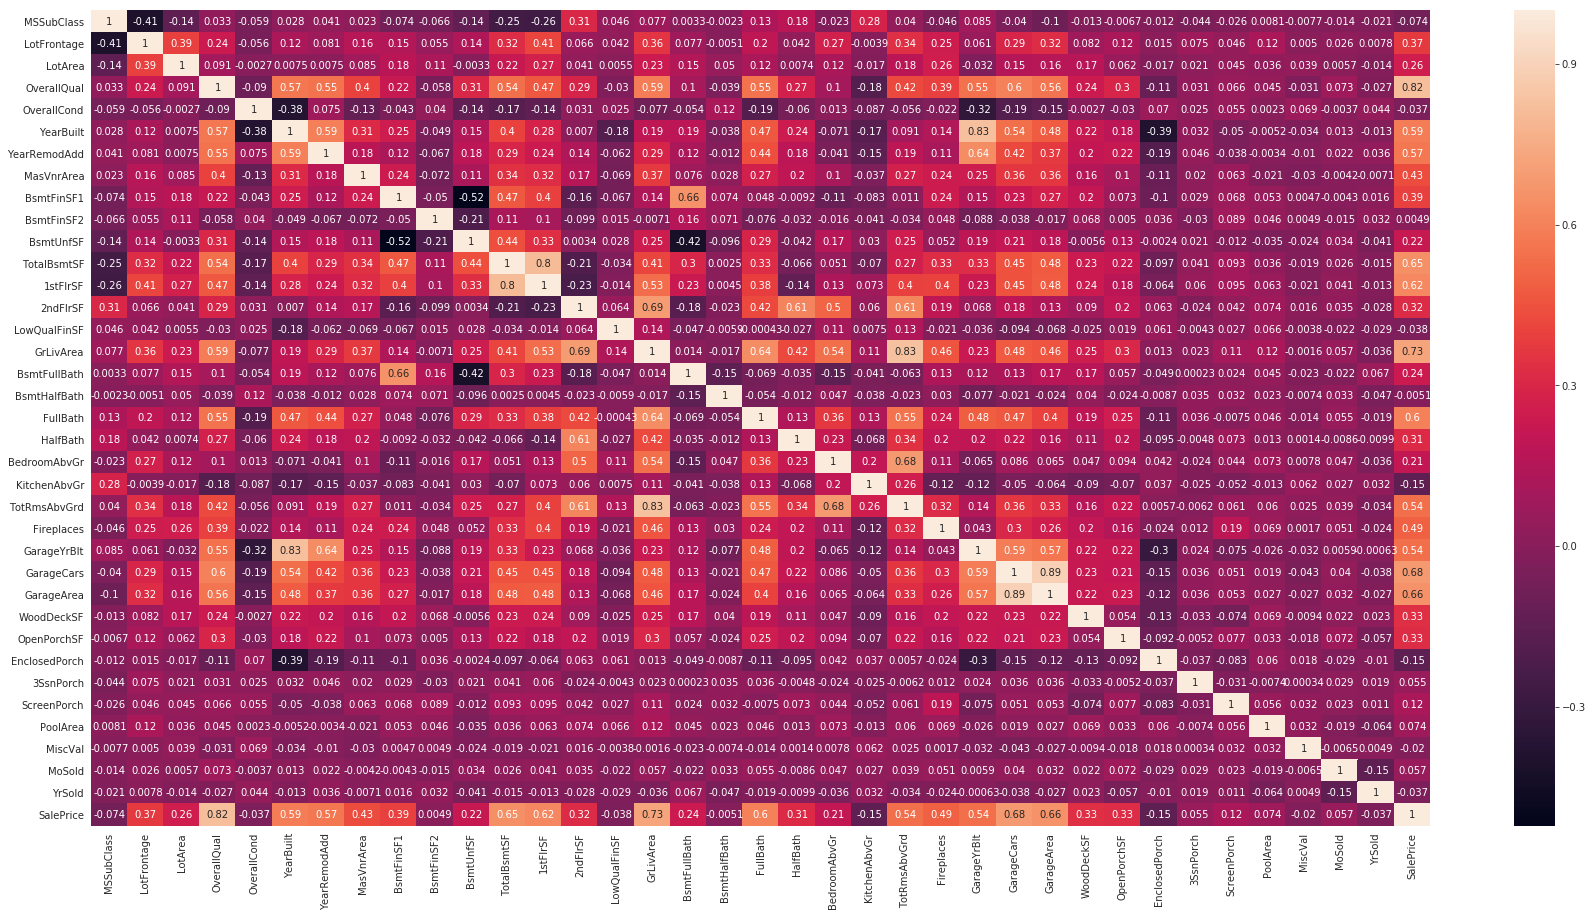

In [ ]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize = (30,15))
sns.heatmap(corrmat,annot=True)

In [ ]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
  all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
  all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [ ]:
all_data['MSZoning'].value_counts(dropna = False)

RL         2263
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:
all_data['Electrical'].value_counts(dropna = False)

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [ ]:
all_data['Electrical'] = all_data['Functional'].fillna(all_data['Electrical'].mode()[0])

In [ ]:
all_data['KitchenQual'].value_counts(dropna = False)

TA     1492
Gd     1151
Ex      203
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
all_data['Exterior1st'].value_counts(dropna = False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [ ]:
all_data['Exterior2nd'].value_counts(dropna = False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [ ]:
all_data['SaleType'].value_counts(dropna = False)

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:
print('Total missing data: {}'.format(all_data.isnull().sum().sum()))

Total missing data: 0


In [ ]:
# Feature engeneering

In [ ]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[abs(skewness['Skew']) > 0.75]


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness[abs(skewness.Skew) > 0.75].shape

(36, 1)

In [ ]:
skewness = skewness[abs(skewness.Skew) > 0.75]

lam = 0.15
for feat in skewness.index:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [ ]:
# dummy variables
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 222)


In [ ]:
train = all_data[:train_len]
test = all_data[train_len:]

In [ ]:
# Modeling

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
ENet2 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.1, random_state=3))

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1101 (0.0069)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1101 (0.0069)



In [ ]:
score = rmsle_cv(ENet2)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1135 (0.0080)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1717 (0.0072)



In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1173 (0.0071)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1151 (0.0067)



In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1151 (0.0067)



In [ ]:
# Stacking Models

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [ ]:
selected_models = (ENet, GBoost, KRR, lasso)
averaged_models = AveragingModels(models = selected_models)

In [ ]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1127 (0.0084)



In [ ]:
# Stacking averaged Models Class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
      
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
b_models = (ENet, GBoost, KRR)
m_model = lasso
stacked_averaged_models = StackingAveragedModels(base_models = b_models,
                                                 meta_model = m_model)

In [ ]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1076 (0.0070)


In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
# Training and Prediction

In [ ]:
# prediction of stacked regressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

In [ ]:
print(rmsle(y_train, stacked_train_pred))

0.08154862282968121


In [ ]:
# prediction of XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))

In [ ]:
print(rmsle(y_train, xgb_train_pred))

0.07890122191508693


In [ ]:
# prediction of LightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))

In [ ]:
print(rmsle(y_train, lgb_train_pred))

0.07373820134198139


In [ ]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07538904013226218


In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
# Download files
sub = pd.DataFrame({'Id':test_id, 'SalePrice':ensemble})
sub.to_csv('submission.csv', index = False)
files.download('submission.csv')